## A example binomial distribuition

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import binom

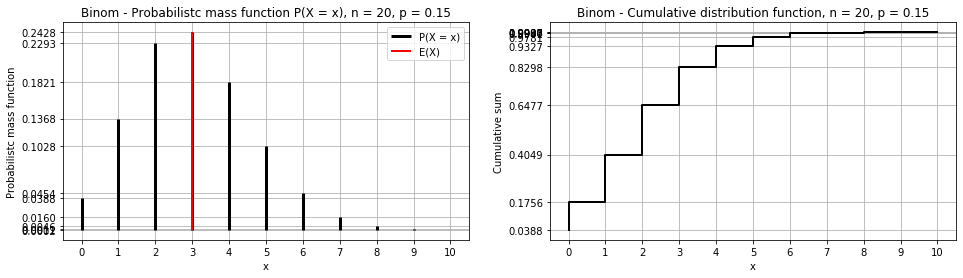

In [3]:

n, p = 20, 0.15
x = np.arange(0,10+1)
binom_pmf = binom(n,p).pmf(x) # probabilistc mass function
binom_cdf = binom(n,p).cdf(x) # cumulative distribution function


# PLOT
fig, (axe1,axe2) = plt.subplots(1,2, figsize=(16,4))

# Probabilistc mass function plot
axe1.vlines(x,0,binom_pmf, lw=3, label='P(X = x)')
axe1.set_xlabel('x')
axe1.set_ylabel('Probabilistc mass function')
axe1.set_title('Binom - Probabilistc mass function P(X = x), n = 20, p = 0.15')
axe1.grid()
axe1.set_yticks(binom_pmf)
axe1.set_xticks(x)

axe1.vlines(n*p, 0, binom(n,p).pmf(n*p), color='red', lw=2, label='E(X)') # E(X)
# plot o valor esperado E(X) e sua probabilidade da distribuição binomial, teoricamente esse
# valor é calculado por E(X) = np
axe1.legend()

# Cumulative distribution function
axe2.step(x, binom_cdf, lw=2, color='black')
axe2.set_title('Binom - Cumulative distribution function, n = 20, p = 0.15')
axe2.set_xlabel('x')
axe2.set_ylabel('Cumulative sum')
axe2.set_xticks(x)
axe2.set_yticks(binom_cdf)
axe2.grid()

plt.show()


In [4]:

# necessário o uso de: from scipy.stats import binom

def prob_interval_binom(n,p, a,b):
    """Obtém a probabilidade dentro de um intervalo [a,b] para a distribuição binomial
    n,p: int, float, parãmetros da distribuição binomial
    [a,b]: int, intervalo para o cálculo da probabilidade total
    return: probabilidade total no intervalo [a,b]
    
    Exemplo:
    p = prob_interval_binom(20,0.15,2,4)
    
    Output:
    p = 0.6542889701799701
    """
    sum_prob = 0
    for i in range(a,b+1):
        sum_prob += binom(n,p).pmf(i)
    return sum_prob
        


def binom_kProbLess(prob, n,p,x):
    """Obtém o último valor inteiro e sua probabilidade acumulada da distribuição binomial
    de modo que a probabilidade acumulada não ultrapasse prob
    prob: float [0,1], maxima probabilidade para a distribuição acumulada
    n, p: int, float, parâmetros para a distribuição binomial
    x: lista contendo o intervalo de valores para o cálculo da distribuição binomial
    return: Tupla (k, cumsum), Contendo o valor inteiro k, último valor para qual a probabilidade
    acumulada é <= prob, e sua respectiva soma acumulada.
    
    Exemplo:
    k, c = binom_kProbLess(0.95, 20,0.15, np.arange(0,10))
    
    output:
    k = 5
    c = 0.9393053680586388
    """
    cumsum = 0
    for i in range(len(x)):
        cumsum += binom(n,p).pmf(i)
        if(cumsum > prob and i >= 1):
            k = x[i-1]
            cumsum -= binom(n,p).pmf(x[i-i])
            return (k,cumsum)
    return 0

        

print('Probabilidade entorno da E(X), nesse caso, soma da probabilidade no intervalo [2,4]: ',prob_interval_binom(n,p,2,4))
print('Inteiro k,e sua probabilidade acumulada, tal que F(k) = P(X <= k) é próximo de 0.95: ',binom_kProbLess(0.95, n,p, x))
#Acima, F(k), representa a probabilidade acumulada da distribuição binomial

Probabilidade entorno da E(X), nesse caso, soma da probabilidade no intervalo [2,4]:  0.6542889701799701
Inteiro k,e sua probabilidade acumulada, tal que F(k) = P(X <= k) é próximo de 0.95:  (5, 0.9393053680586388)


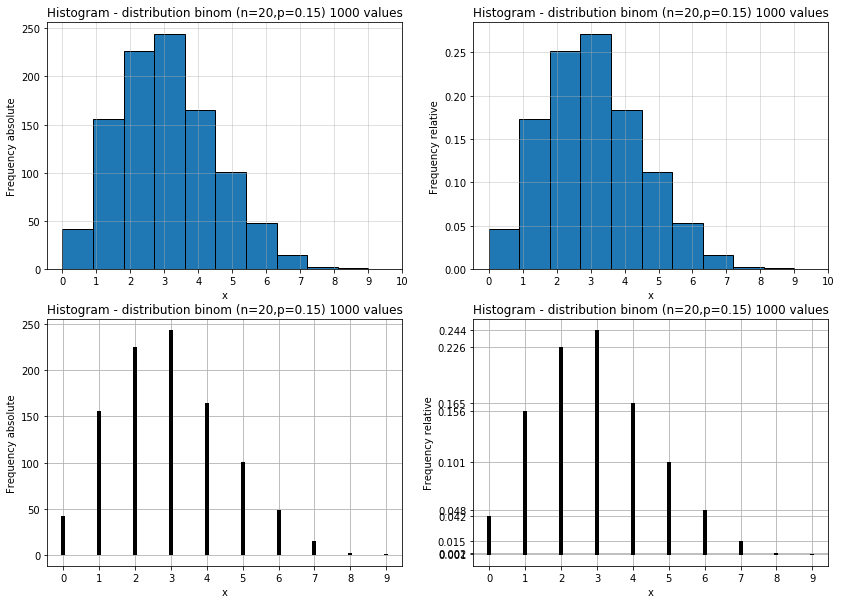

In [43]:

# gerando 1000 valores aleatórios usando a binomial com parâmetros n,p
binom_ranValues = binom.rvs(n,p,size=1000, random_state=42)

#plot
fig, ([axe1,axe2],[axe3,axe4]) = plt.subplots(2,2, figsize=(14,10))
axe1.hist(binom_ranValues, edgecolor='black')
axe1.set_xticks(np.arange(0,10+1))
axe1.grid(alpha=0.5)
axe1.set_xlabel('x')
axe1.set_ylabel('Frequency absolute')
axe1.set_title('Histogram - distribution binom (n=20,p=0.15) 1000 values')

axe2.hist(binom_ranValues, edgecolor='black', density=True,)
axe2.set_xticks(np.arange(0,10+1))
axe2.grid(alpha=0.5)
axe2.set_xlabel('x')
axe2.set_ylabel('Frequency relative')
axe2.set_title('Histogram - distribution binom (n=20,p=0.15) 1000 values')

values, value_counts = np.unique(binom_ranValues, return_counts=True)

# mesma coisa acima só que com um visual diferente
axe3.vlines(values,0, value_counts, lw=4)
axe3.set_title('Histogram - distribution binom (n=20,p=0.15) 1000 values')
axe3.set_xlabel('x')
axe3.set_ylabel('Frequency absolute')
axe3.set_xticks(values)
axe3.grid()

axe4.vlines(values,0, value_counts/len(binom_ranValues), lw=4)
axe4.set_title('Histogram - distribution binom (n=20,p=0.15) 1000 values')
axe4.set_xlabel('x')
axe4.set_ylabel('Frequency relative')
axe4.set_xticks(values)
axe4.set_yticks(value_counts/len(binom_ranValues))
axe4.grid()


plt.show()

## Questions

- Sua vez agora.  Obtenha o gráfico das probabilidades P(X = k) e da função de probabilidade acumulada F(x) para uma v.a. X ∼ Bin(n= 20,θ= 0.15). Em seguida, responda ás questões abaixo.

Resolvido acima.

- Qual o valor k em que P(X = k)  ́é máxima? Quanto é esta probabilidade máxima?

Observando a plotagem da função de massa de probabilidade temos que P(X = k) é máxima quando k = 3, sendo P(X = 3) = 0.2428.

- VISUALMENTE, obtenha uma faixa de valores (a,b) na qual a probabilidade de X ∈ (a,b) seja próxima de 1.  Procure grosseiramente obter a faixa mais estreita possível.

Observando a plotagem da função de massa de probabilidade temos que o intervalo (1,4) é um intervalo mais estreito e mantém uma probabilidade pŕoxima de 1. 
Abaixo é calculado essa probabilidade, usando a função definida acima, <b>prob_interval_binom</b>.

In [6]:
print('Probabilidade intervalo [1,4]: ',prob_interval_binom(n, p, 1,4))

Probabilidade intervalo [1,4]:  0.7910873151841384


- O valor (teórico) de E(X) no caso de uma binomial é nθ.  Como  ́é o comportamento da função P(X = k) no entorno deste valor E(X)?  Ela tem valores P(X = k) relativamente altos?

Observando a plotagem da função de massa de probabilidade acima temos que entorno de E(X) a probabilidade é bastante alto, se comparado a probabilidade dos outros valores.

- Confirme esta impressãoo calculando P(a ≤ X ≤ b) usando a função dnorm ou pnorm do R.  Por exemplo, se eu quiser P(5 ≤ X ≤ 8), uso sum(dnorm(5:8, 20, 0.15) ou então o pbinom(8,20, 0.15) - pbinom(5-0.01, 20, 0.15).   Porque  eu  subtraio  0.01  de  5  na  chamada  da segunda função?

Isso é feito acima definindo e usando a função <b>prob_interval_binom</b>. O resultado obtido é:<br>
Probabilidade entorno da E(X), nesse caso, soma da probabilidade no intervalo [2,4]:  0.6542889701799701

- Use qbinom para obter o inteiro k tal que F(k) = P(X ≤ k) ≈ 0.95.

Isso é feito acima usando definindo e usando a função <b>binom_kProbLess</b>. O resultado obtido é: <br>
Inteiro k,e sua probabilidade acumulada, tal que F(k) = P(X <= k) é próximo de 0.95:  (5, 0.9393053680586388)

- Verifique o valor da probabilidade acumulada exata F(k) obtida com o inteiro acima usando pbinom.

Isso é respondido logo acima com:<br>
Inteiro k,e sua probabilidade acumulada, tal que F(k) = P(X <= k) é próximo de 0.95: (5, 0.9393053680586388)

- Gere  1000  valores  aleatórios  independentes  de X∼Bin(n=  20,θ=  0.15). Estes  valores cairam,  em  sua  maioria,  na  faixa  que  você  escolheu  mais  acima?   Qual  a  porcentagem  de valores que caiu na faixa que você escolheu?

Acima é possível observar a plotagem de histogramas, frequência relativa e absoluta, para 1000 valores sendo gerandos entre [0,10] com a distribuição binomial, usando n = 20 e p = 0.15. É possível observar que a maior parte dos valores caíram dentro do intervalo esperado [1,4]. A porcentagem de valores que caiu nesse faixa é obtido logo abaixo:

In [52]:
print('Values: ', values, '\nValue Counts: ', value_counts)

a, b = 1,4 #limites do intervalo


intervalo = range(a,b+1)
porc = 0
for index, val in enumerate(values):
    for i in intervalo:
        if(i == val):
            porc += value_counts[index]      
porc /= sum(value_counts)

print('Porcentagem de valores da faixa escolhida [{0},{1}]: {2}'.format(a,b, porc))

Values:  [0 1 2 3 4 5 6 7 8 9] 
Value Counts:  [ 42 156 226 244 165 101  48  15   2   1]
Porcentagem de valores da faixa escolhida [1,4]: 0.791


- Compare os valores das probabilidades P(X = k) para k = 0,...6 e as frequências relativas destes inteiros nos 1000 valores simulados. São parecidos?

Podemos ver abaixo que os valores são bem próximos.

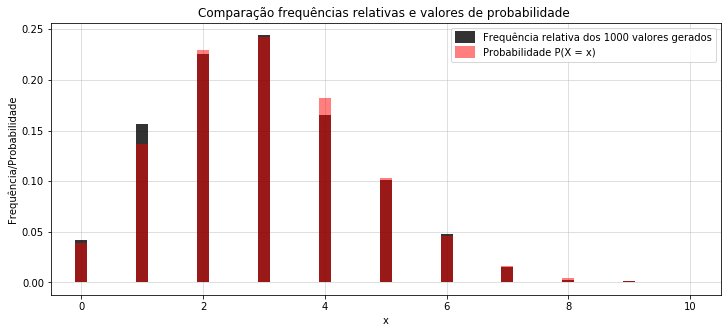

In [71]:

fig, axe = plt.subplots(figsize=(12,5))

axe.vlines(values, 0, value_counts/len(binom_ranValues), lw=12, alpha=0.8, label='Frequência relativa dos 1000 valores gerados') # frequencia relativa valores gerados
axe.vlines(x, 0,binom(n,p).pmf(x), color='red', lw=12, alpha=0.5, label='Probabilidade P(X = x)') # probabilidade prevista P(X = x) para valores
axe.set_xlabel('x')
axe.set_ylabel('Frequência/Probabilidade')
axe.set_title('Comparação frequências relativas e valores de probabilidade ')
axe.legend()
axe.grid(alpha=0.5)

plt.show()

## References

[1]https://homepages.dcc.ufmg.br/~assuncao/EstatCC/LivroDeExerciciosFECD.pdf
<br>
[2]https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom
<br>